In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
def watershed():
    # read image, display initial
    root = os.getcwd()
    imgPath = os.path.join('133714307132583225.jpg') 
    img = cv.imread(imgPath)
    img = img[900:1300,300:900]
    plt.imshow(img)

    # convert ot greyscale and RBG image
    imgRGB = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    plt.figure()
    plt.subplot(231)
    plt.imshow(img)

    plt.subplot(232)
    plt.imshow(imgRGB)

    # show binary map: b is 
    plt.subplot(233)
    _,imgThreshold = cv.threshold(img,120,255,cv.THRESH_BINARY_INV)
    plt.imshow(imgThreshold,cmap = 'gray')
    plt.show

    # image dilation: removes stray black parts that aren't supposed to be there (removes hyperspecificity)
    plt.subplot(234)
    kernel = np.ones((3,3), np.uint8)
    imagDilate = cv.morphologyEx(imgThreshold,cv.MORPH_DILATE, kernel)
    plt.imshow(imagDilate)
    plt.show

    # can remove background; however because unclear border for trees, will skip this step

    #distance transform: distance from current pixel to nearest black pixel; basically finds center of regions
    plt.subplot(235)
    distTrans = cv.distanceTransform(imagDilate,cv.DIST_L2,5)
    plt.imshow(distTrans)

    # finds regions and number them using labels
    plt.subplot(236)
    _,distThresh = cv.threshold(distTrans,12,255,cv.THRESH_BINARY)
    plt.imshow(distThresh)

    # the actual connected components (requires modification of data, both datatype and shape)
    # plt.subplot(237)
    distThresh = np.uint8(distThresh)
    _,labels = cv.connectedComponents(distThresh)
    plt.imshow(labels)

    # watershed implementation
    plt.figure()
    plt.subplot(121)
    labels = np.int32(labels)
    labels = cv.watershed(imgRGB,labels)
    plt.imshow(labels)

    # highlight one specific feature
    plt.subplot(122)
    imgRGB[labels == 0] = [255,0,0]
    plt.imshow(imgRGB)
    

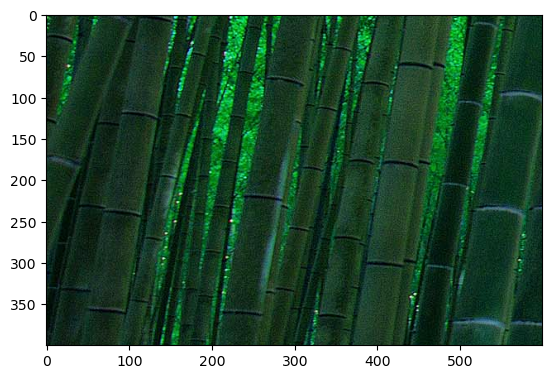

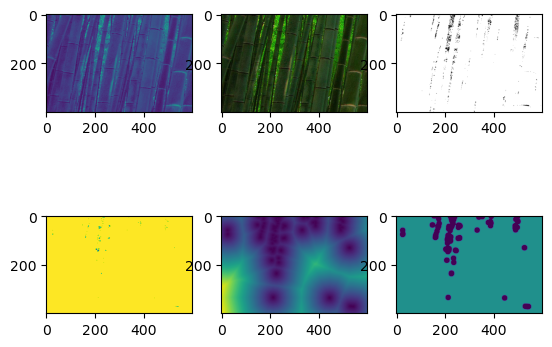

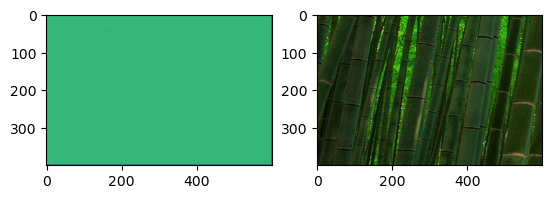

In [5]:
if __name__ == '__main__':
    watershed()